<a href="https://colab.research.google.com/github/analyticsbyted/nfl/blob/main/nfl_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install nfl_data_py
!pip install pandas
!pip install os
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.4 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.0-py3-none-any.whl size=25088 sha256=0d6c9285bdf886c06a9e7873941003bab400849a1f60c6fe65ca2929d591880d
  Stored in directory: /root/.cache/pip/wheels/83/17/5a/750f2a5cec7b32c7df0a0130ae6abb97ffb44dee391c6d8d27
Successfully built nfl_data_py
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [4]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [5]:
pbp = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [6]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,None,None,NaN,None,NaN,47969;53059;42500;46279;53575;48364;46253;5460...,00-0036157;00-0035202;00-0037984;00-0029597;00...,00-0035537;00-0032134;00-0034419;00-0036500;00...,11,11
2,68.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
3,89.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;42371;53443;42500;44999;43433;3309...,00-0036924;00-0032466;00-0032234;00-0036979;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
4,115.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11


In [7]:
pbp.shape

(50147, 384)

In [9]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_formation', 'offense_personnel', 'defenders_in_box',
       'defense_personnel', 'number_of_pass_rushers', 'players_on_play',
       'offense_players', 'defense_players', 'n_offense', 'n_defense'],
      dtype='object', length=384)

In [10]:
pbp.dtypes

play_id            float32
game_id             object
old_game_id         object
home_team           object
away_team           object
                    ...   
players_on_play     object
offense_players     object
defense_players     object
n_offense            int32
n_defense            int32
Length: 384, dtype: object

Since we do not want special teams plays, we will subset the data to just the run or pass plays only

In [11]:
pbp_rp = pbp[(pbp['pass'] == 1 ) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset = ['epa', 'posteam', 'defteam'])
pbp_rp.shape

(36863, 384)

Now lets get some Stats!

In [12]:
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values('pass_epa', ascending=False)

,posteam,pass_epa
15,KC,0.280231
28,SF,0.179196
10,DET,0.174694
3,BUF,0.162691
6,CIN,0.149930
25,PHI,0.130672
14,JAX,0.110617
8,DAL,0.101407
19,MIA,0.087106
20,MIN,0.081581


In [13]:
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})
rush_epa.sort_values('rush_epa', ascending=False)

,posteam,rush_epa
25,PHI,0.094366
2,BAL,0.015354
1,ATL,0.006186
26,PIT,0.005845
23,NYG,0.005760
7,CLE,0.004358
5,CHI,-0.002024
4,CAR,-0.006957
11,GB,-0.009453
15,KC,-0.021943


In [14]:
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa

,posteam,pass_epa,rush_epa
0,ARI,-0.079506,-0.079682
1,ATL,0.002979,0.006186
2,BAL,-0.010278,0.015354
3,BUF,0.162691,-0.052620
4,CAR,-0.063714,-0.006957
5,CHI,-0.074289,-0.002024
6,CIN,0.149930,-0.049671
7,CLE,0.018411,0.004358
8,DAL,0.101407,-0.034671
9,DEN,-0.050991,-0.121433


In [15]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [16]:
logo_paths = []
team_abbr = []

if not os.path.exists("logos"):
  os.makedirs("logos")

for team in range(len(logos)):
  urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
  logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
  team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

epa_with_logos = pd.merge(epa, logo_data, left_on='posteam', right_on='team_abbr')

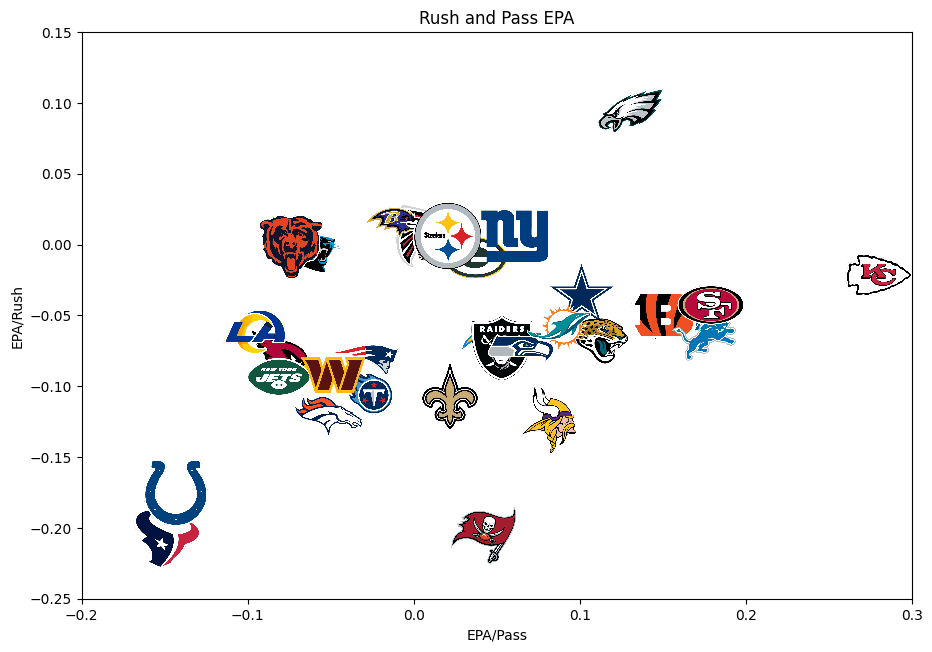

In [22]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams['figure.autolayout'] = True

def getImage(path):
  return OffsetImage(plt.imread(path, format = 'tif'), zoom = .1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
  ab = AnnotationBbox(getImage(path), (x0, y0), frameon = False)
  ax.add_artist(ab)

plt.xlim(-0.2, 0.3)
plt.ylim(-0.25, 0.15)
plt.title('Rush and Pass EPA')
plt.xlabel('EPA/Pass')
plt.ylabel('EPA/Rush')


plt.show()


Bar graph of receiving yards after the catch

In [30]:
receiver_yac = pbp_rp[(pbp_rp['pass'] == 1)].groupby('receiver_player_name').agg({'pass' : 'count',
                  'yards_after_catch' : 'sum'}).reset_index().rename(columns = {'pass' : 'targets', 'yards_after_catch' : 'yac'})
receiver_yac = receiver_yac[(receiver_yac['targets'] >= 100)]

In [35]:
receiver_yac.sort_values('yac', inplace = True)

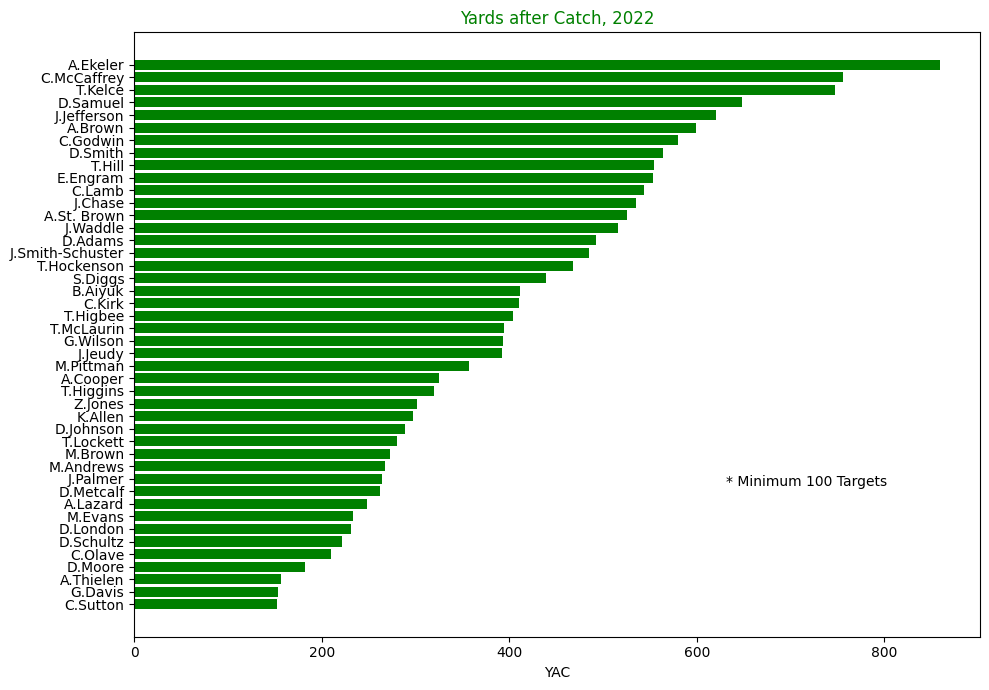

In [53]:
name = receiver_yac['receiver_player_name']
yac = receiver_yac['yac']

fig, ax = plt.subplots(figsize = (10, 7))

ax.barh(name, yac, color = 'green')
ax.set_title('Yards after Catch, 2022', color = 'green')
ax.set_xlabel('YAC')
plt.text(0.7, 0.25, '* Minimum 100 Targets', transform = ax.transAxes, fontsize=16)

plt.show()